# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings("ignore")

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [2]:
# Importing the file porter_data_1.csv
df = pd.read_csv("porter_data_1.csv")

In [3]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df["created_at"] = pd.to_datetime(df["created_at"])
df["actual_delivery_time"] = pd.to_datetime(df["actual_delivery_time"])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [6]:
# Convert categorical features to category type
var_names = ["market_id", "store_primary_category", "order_protocol"]
for var in var_names:
    df[var] = df[var].astype("category")

In [89]:
df_analysis = df.copy()

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
(df["actual_delivery_time"] - df["created_at"]).head()

0   0 days 00:47:00
1   0 days 00:44:00
2   0 days 00:55:00
3   0 days 00:59:00
4   0 days 00:46:00
dtype: timedelta64[ns]

In [9]:
df["time_taken"] = (df["actual_delivery_time"] - df["created_at"]) / pd.Timedelta(
    minutes=1
)

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [10]:
# Extract the hour and day of week from the 'created_at' timestamp
df["pickup_hour"] = df["created_at"].dt.hour
df["day_of_week"] = df["created_at"].dt.day_name()

# Create a categorical feature 'isWeekend'
df["isWeekend"] = df["day_of_week"].apply(
    lambda x: 1 if x == "Saturday" or x == "Sunday" else 0
)
df.drop("day_of_week", axis=1, inplace=True)
df["pickup_hour"] = df["pickup_hour"].astype("category")
df["isWeekend"] = df["isWeekend"].astype("category")

In [11]:
df["num_distinct_items"] = df["num_distinct_items"].astype("category")

In [12]:
df1 = df.copy()

In [13]:
# Drop unnecessary columns
df.drop("actual_delivery_time", axis=1, inplace=True)
df.drop("created_at", axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   market_id                 175777 non-null  category
 1   store_primary_category    175777 non-null  category
 2   order_protocol            175777 non-null  category
 3   total_items               175777 non-null  int64   
 4   subtotal                  175777 non-null  int64   
 5   num_distinct_items        175777 non-null  category
 6   min_item_price            175777 non-null  int64   
 7   max_item_price            175777 non-null  int64   
 8   total_onshift_dashers     175777 non-null  float64 
 9   total_busy_dashers        175777 non-null  float64 
 10  total_outstanding_orders  175777 non-null  float64 
 11  distance                  175777 non-null  float64 
 12  time_taken                175777 non-null  float64 
 13  pickup_hour               175

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [15]:
# Define target variable (y) and features (X)
target_variable = "time_taken"
feature_columns = [col for col in df.columns if col != target_variable]
X = df[feature_columns]
y = df[target_variable]

In [16]:
X.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

  num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                  4             557            1239                   33.0   
1                  1            1400            1400                    1.0   
2                  3             820            1604                    8.0   
3                  1            1525            1525                    5.0   
4                  2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance pickup_hour  \
0                14.0                      21.0     34.44          22   
1                 2.0                       2.0     27.60          21   
2                 6.0                      18.0     11.56           0   
3                 6.0                       8.0     31.80           3   
4                 5.0                       7.0      8.20           2   

  isWeekend  
0         0  
1         0  
2         0  
3         0  
4         0

In [17]:
y.head()

0    47.0
1    44.0
2    55.0
3    59.0
4    46.0
Name: time_taken, dtype: float64

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [18]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, test_size=0.2, random_state=0
)

In [20]:
df_train = X_train.copy()
df_train["time_taken"] = y_train
df_test = X_test.copy()
df_test["time_taken"] = y_test

In [21]:
df_train.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
143786       1.0                      4            3.0            3      2495   
165941       2.0                     46            5.0            2      1074   
53920        4.0                     72            1.0            3      2775   
150506       2.0                     20            5.0            2      1645   
69767        4.0                     39            5.0            3      2425   

       num_distinct_items  min_item_price  max_item_price  \
143786                  3             450            1450   
165941                  2             275             799   
53920                   2             925             925   
150506                  2             695             950   
69767                   3             475             975   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
143786                   18.0                18.0                      24.0   
165941                   36.0                35.0                      49.0   
53920                    14.0                 9.0                      11.0   
150506                   85.0               112.0                     100.0   
69767                   100.0                78.0                     136.0   

        distance pickup_hour isWeekend  time_taken  
143786     16.40          19         1        44.0  
165941     16.36          19         0        35.0  
53920      30.00           2         0        49.0  
150506     34.52           2         0        39.0  
69767      10.88           2         1        43.0

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [22]:
# Define numerical and categorical columns for easy EDA and data manipulation
def categorize(df, columns):
    """
    Categorize columns as numeric or category
    """
    numerical_variables = []
    categorical_variables = []
    for col in columns:
        # print(df[col].dtype)
        if df[col].dtype in ("int64", "float64"):

            numerical_variables.append(col)
        else:
            categorical_variables.append(col)
    return numerical_variables, categorical_variables


numeric_vars, categorical_vars = categorize(X_train, X_train.columns.tolist())
print("Numerical variables:", numeric_vars, "\n\n")
print("Categorical variables:", categorical_vars)

Numerical variables: ['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance'] 


Categorical variables: ['market_id', 'store_primary_category', 'order_protocol', 'num_distinct_items', 'pickup_hour', 'isWeekend']


In [23]:
df.to_excel("porter_proper.xlsx")

##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [47]:
numeric_vars,categorical_vars = categorize(X_train,X_train.columns.tolist())

In [54]:
numeric_vars.remove('max_item_price')

In [24]:
# Plot distributions for all numerical columns

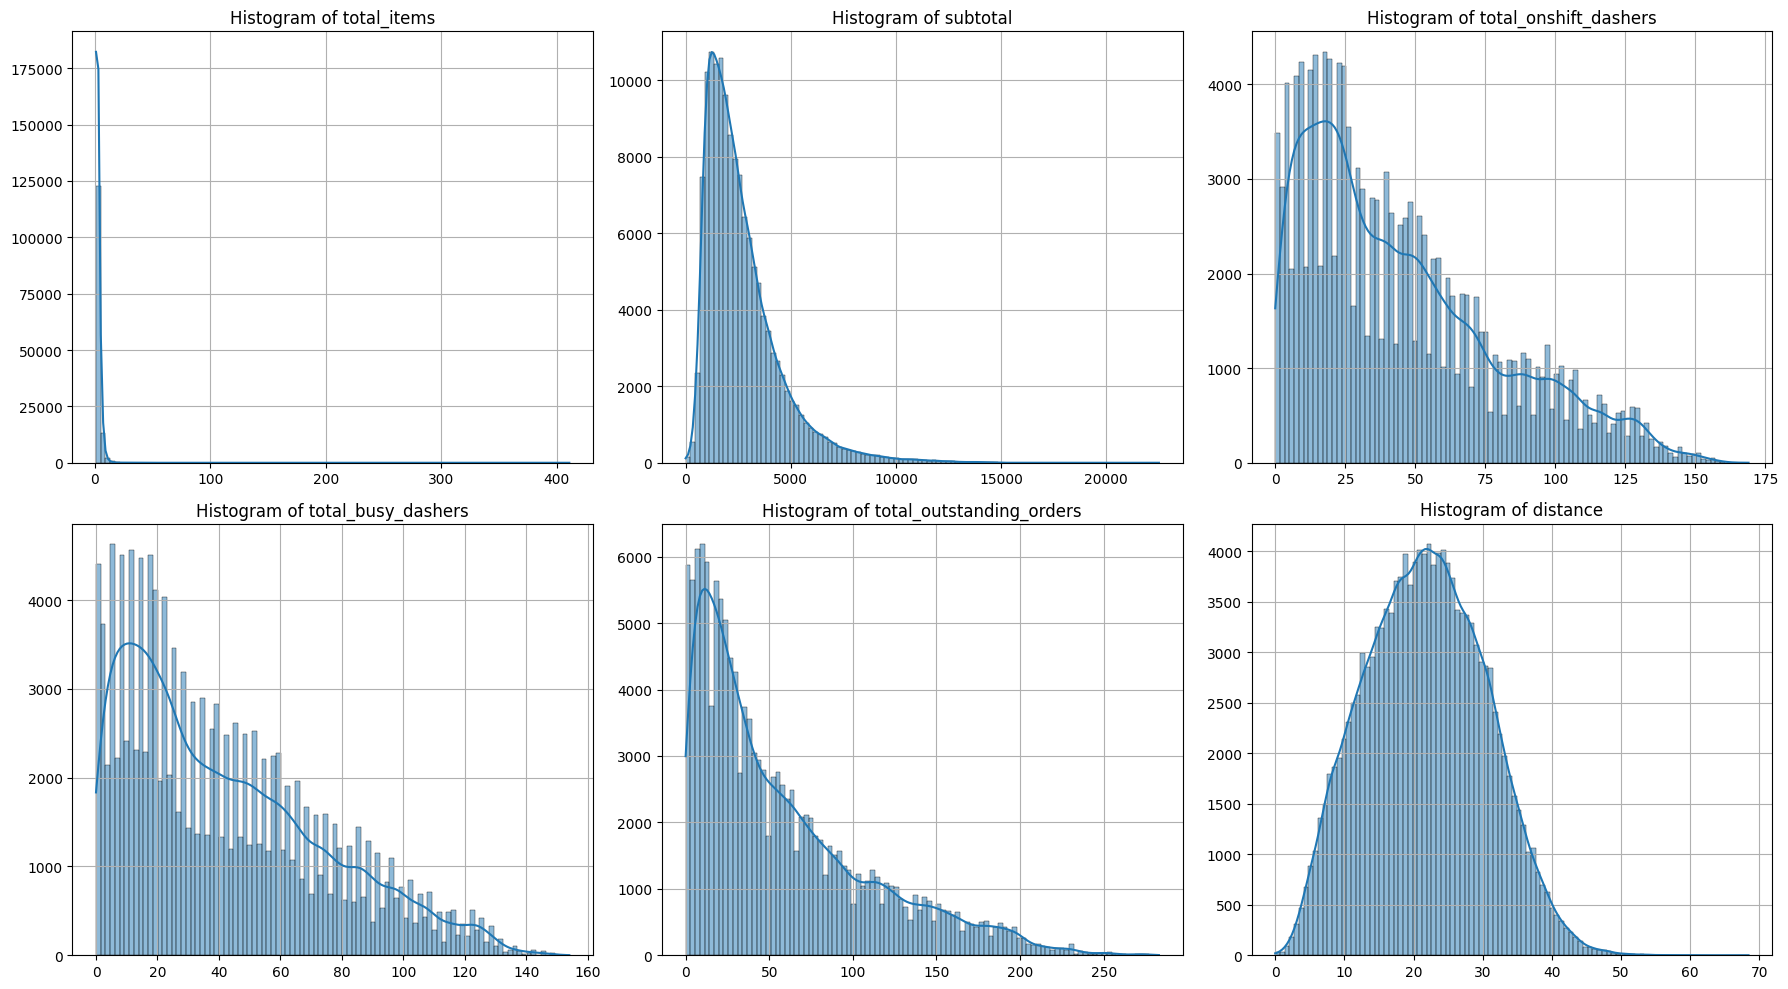

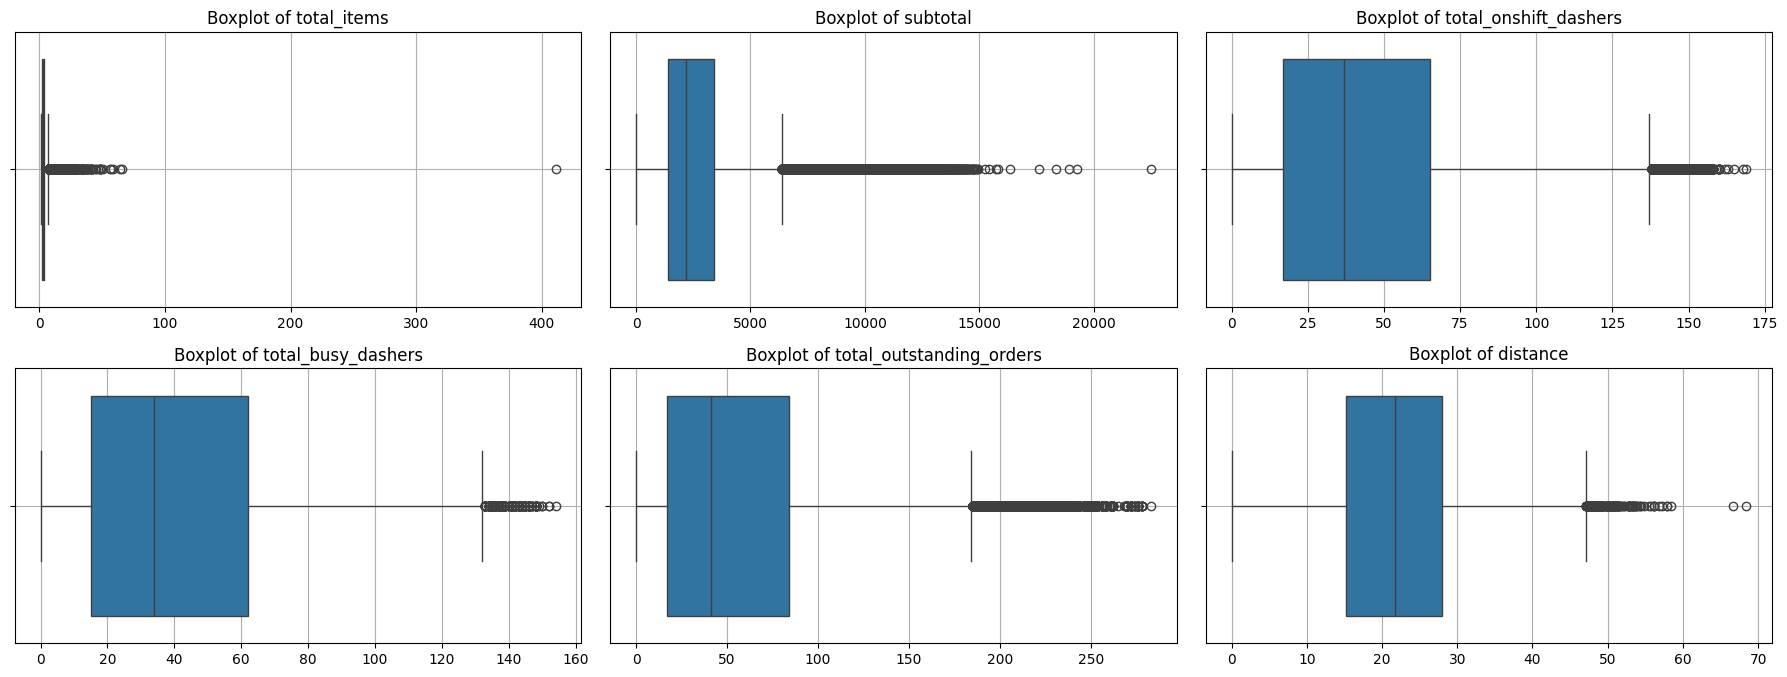

In [58]:
# Plotting histograms and boxplots for each numerical feature
plt.figure(figsize=(18, 10))

for i, feature in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.histplot(X_train[feature], kde=True,bins=100)
    plt.title(f'Histogram of {feature}')
    plt.xlabel('')
    plt.ylabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 10))

for i, feature in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=X_train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

In [26]:
# Distribution of categorical columns
plt.style.use("default")

In [64]:
# Plotting categorical variables
plt.figure(figsize=(30,18))
for i, col in enumerate(categorical_vars, 1):
    plt.subplot(2,2,i)
    sns.countplot(y=X_train[col], order=X_train[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.title(f'distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('frequency')
    plt.grid(True)
plt.tight_layout()
plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

In [28]:
# Distribution of time_taken
sns.histplot(y_train, kde=True)
plt.show()

In [29]:
plt.style.use("default")

# Create pairplot with proper features
plt.figure(figsize=(20, 10))

for i, var in enumerate(numeric_vars, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=X_train[var], y=y_train)
    plt.xlabel(var)
    plt.ylabel("time_taken")
plt.tight_layout()
plt.show()

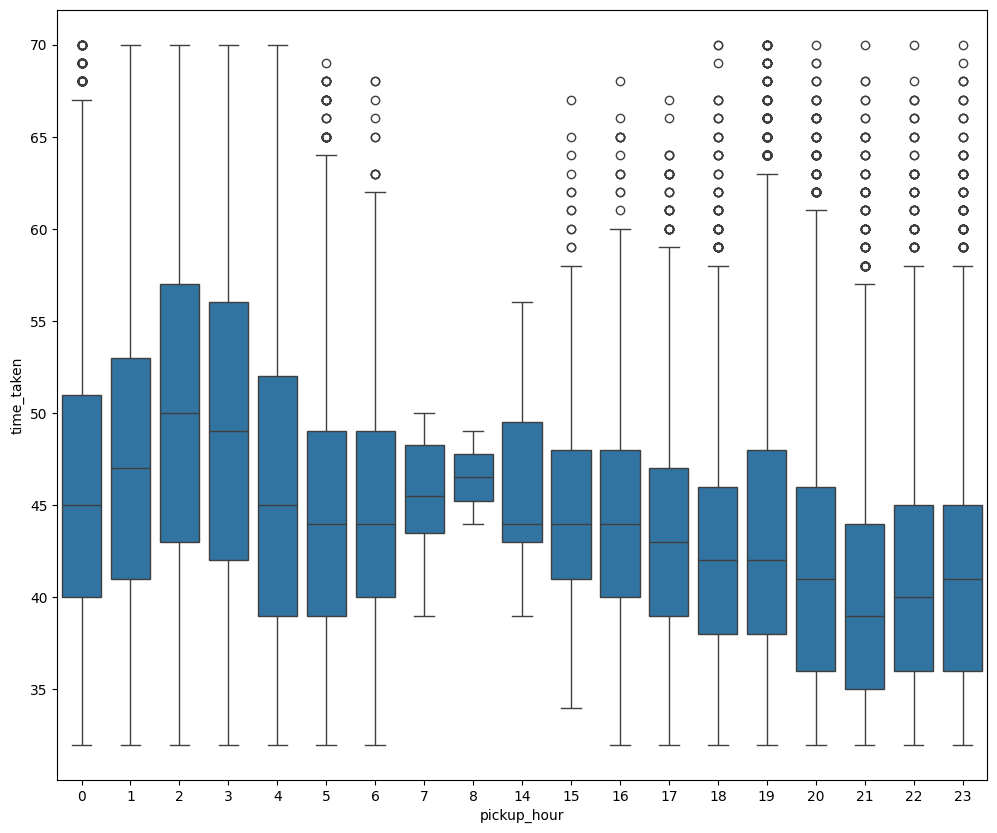

In [69]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 10))
sns.boxplot(x=X_train['pickup_hour'], y=y_train)
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

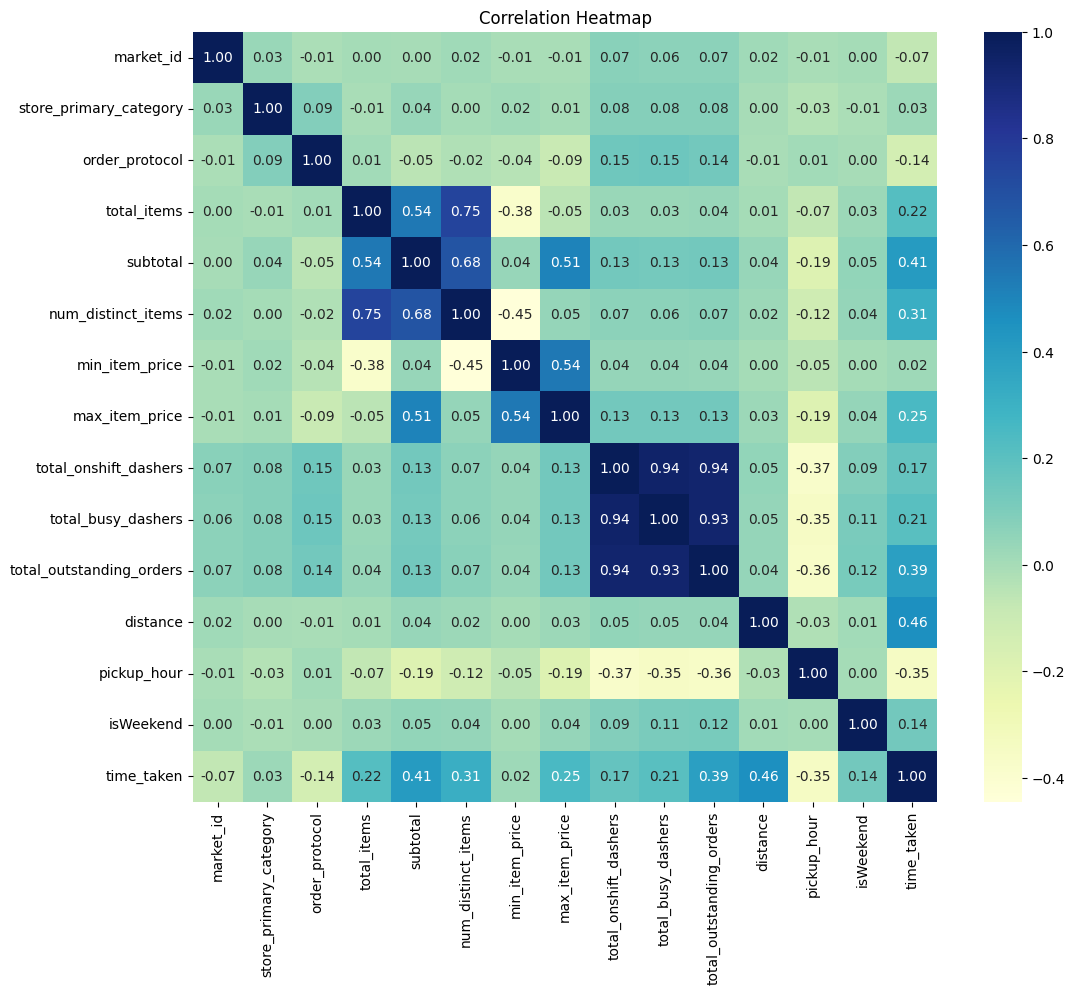

In [32]:
# Plot the heatmap of the correlation matrix

plt.figure(figsize=(12, 10))

X_copy = X_train.copy()
X_copy["time_taken"] = y_train
# Calculate the correlation matrix
corr_matrix = X_copy.corr()

# Plot the heatmap

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

In [33]:
# Create correlation matrix
corr_matrix

market_id  store_primary_category  order_protocol  \
market_id                  1.000000                0.033374       -0.013555   
store_primary_category     0.033374                1.000000        0.090729   
order_protocol            -0.013555                0.090729        1.000000   
total_items                0.002963               -0.006025        0.007857   
subtotal                   0.000422                0.040288       -0.052668   
num_distinct_items         0.016041                0.001712       -0.023119   
min_item_price            -0.010062                0.016755       -0.044172   
max_item_price            -0.007367                0.006043       -0.091294   
total_onshift_dashers      0.073178                0.082543        0.147366   
total_busy_dashers         0.064063                0.083024        0.151533   
total_outstanding_orders   0.067378                0.081552        0.135817   
distance                   0.017131                0.000691       -0.009327   
pickup_hour               -0.009478               -0.034552        0.012112   
isWeekend                  0.002113               -0.014958        0.000816   
time_taken                -0.071833                0.027116       -0.138101   

                          total_items  subtotal  num_distinct_items  \
market_id                    0.002963  0.000422            0.016041   
store_primary_category      -0.006025  0.040288            0.001712   
order_protocol               0.007857 -0.052668           -0.023119   
total_items                  1.000000  0.544752            0.746118   
subtotal                     0.544752  1.000000            0.680913   
num_distinct_items           0.746118  0.680913            1.000000   
min_item_price              -0.382160  0.039562           -0.445130   
max_item_price              -0.054731  0.508340            0.045881   
total_onshift_dashers        0.032794  0.132075            0.068047   
total_busy_dashers           0.029981  0.127398            0.063219   
total_outstanding_orders     0.035345  0.131227            0.070125   
distance                     0.006169  0.037923            0.024749   
pickup_hour                 -0.070795 -0.190449           -0.119158   
isWeekend                    0.027473  0.046404            0.043365   
time_taken                   0.220410  0.412612            0.312259   

                          min_item_price  max_item_price  \
market_id                      -0.010062       -0.007367   
store_primary_category          0.016755        0.006043   
order_protocol                 -0.044172       -0.091294   
total_items                    -0.382160       -0.054731   
subtotal                        0.039562        0.508340   
num_distinct_items             -0.445130        0.045881   
min_item_price                  1.000000        0.543312   
max_item_price                  0.543312        1.000000   
total_onshift_dashers           0.040736        0.133460   
total_busy_dashers              0.042268        0.131740   
total_outstanding_orders        0.039796        0.131177   
distance                        0.004001        0.028322   
pickup_hour                    -0.050031       -0.188643   
isWeekend                       0.001209        0.044769   
time_taken                      0.022503        0.254330   

                          total_onshift_dashers  total_busy_dashers  \
market_id                              0.073178            0.064063   
store_primary_category                 0.082543            0.083024   
order_protocol                         0.147366            0.151533   
total_items                            0.032794            0.029981   
subtotal                               0.132075            0.127398   
num_distinct_items                     0.068047            0.063219   
min_item_price                         0.040736            0.042268   
max_item_price                         0.133460            0.131740   
total_onshift_dashers   

In [34]:
# Drop 3-5 weakly correlated columns from training dataset
X_train_copy = X_train.copy()
X_train.drop(
    ["store_primary_category", "market_id", "min_item_price"],
    axis=1,
    inplace=True,
)
X_test.drop(
    ["store_primary_category", "market_id", "min_item_price"],
    axis=1,
    inplace=True,
)

In [35]:
df_train.drop(
    ["store_primary_category", "market_id", "min_item_price"], axis=1, inplace=True
)
df_test.drop(
    ["store_primary_category", "market_id", "min_item_price"], axis=1, inplace=True
)

In [36]:
X_train.head()

order_protocol  total_items  subtotal num_distinct_items  \
143786            3.0            3      2495                  3   
165941            5.0            2      1074                  2   
53920             1.0            3      2775                  2   
150506            5.0            2      1645                  2   
69767             5.0            3      2425                  3   

        max_item_price  total_onshift_dashers  total_busy_dashers  \
143786            1450                   18.0                18.0   
165941             799                   36.0                35.0   
53920              925                   14.0                 9.0   
150506             950                   85.0               112.0   
69767              975                  100.0                78.0   

        total_outstanding_orders  distance pickup_hour isWeekend  
143786                      24.0     16.40          19         1  
165941                      49.0     16.36          19         0  
53920                       11.0     30.00           2         0  
150506                     100.0     34.52           2         0  
69767                      136.0     10.88           2         1

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>




##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

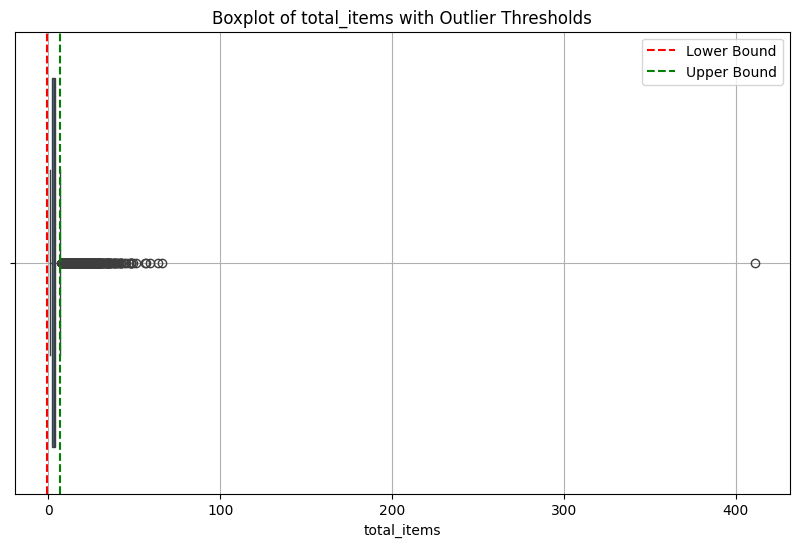

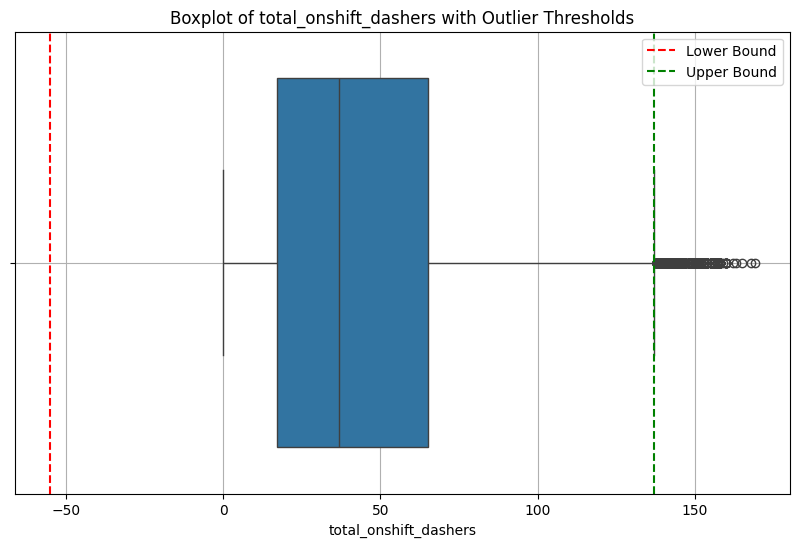

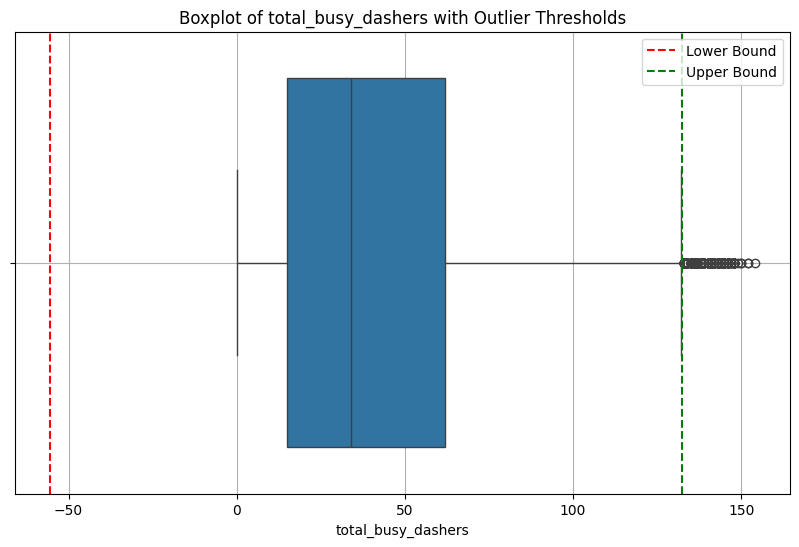

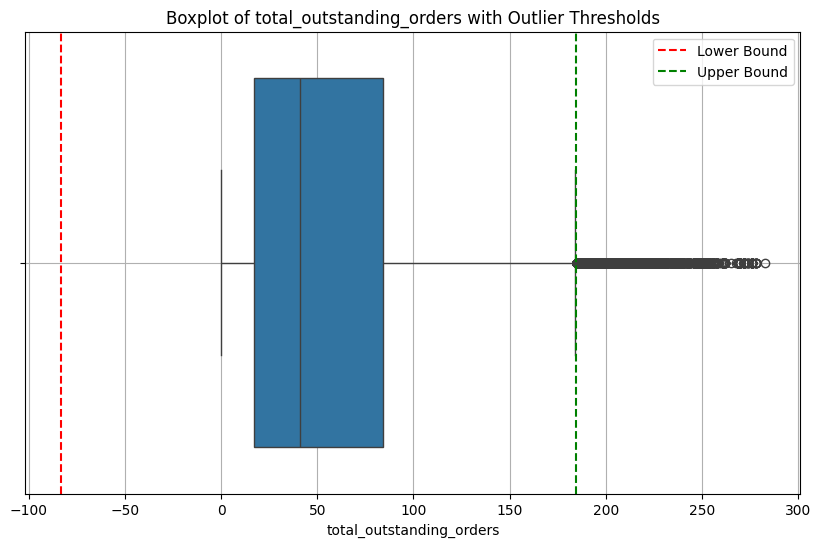

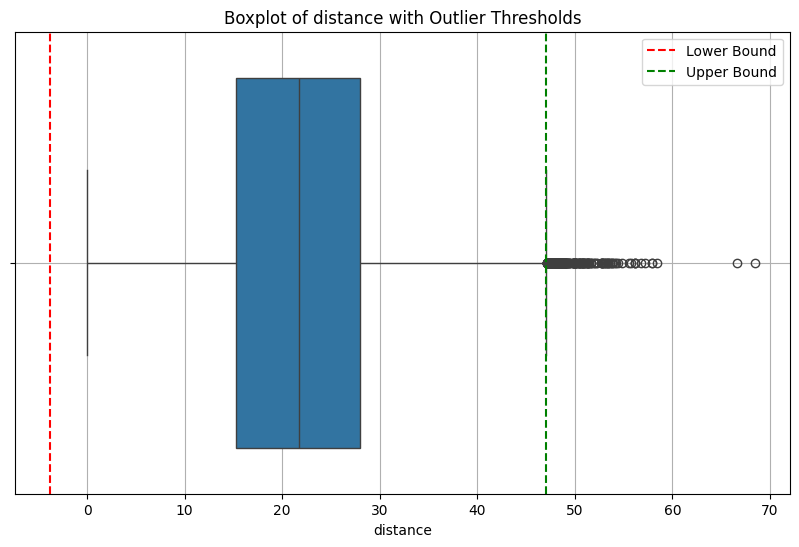


total_items:
Number of outliers: 6561
Lower Bound: -1.0
Upper Bound: 7.0

subtotal:
Number of outliers: 6219
Lower Bound: -1592.5
Upper Bound: 6387.5

total_onshift_dashers:
Number of outliers: 1133
Lower Bound: -55.0
Upper Bound: 137.0

total_busy_dashers:
Number of outliers: 433
Lower Bound: -55.5
Upper Bound: 132.5

total_outstanding_orders:
Number of outliers: 4216
Lower Bound: -83.5
Upper Bound: 184.5

distance:
Number of outliers: 220
Lower Bound: -3.8000000000000025
Upper Bound: 47.08


In [66]:
# Function to detect outliers using IQR and plot boxplots
def detect_outliers_and_plot(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifying outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # Plotting boxplot with outlier thresholds

    plt.figure(figsize=(10, 6))

    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
    plt.axvline(upper_bound, color='green', linestyle='--', label='Upper Bound')
    plt.title(f'Boxplot of {column} with Outlier Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()

    return outliers, lower_bound, upper_bound

# Applying the function to each numerical feature and plotting
outlier_info = {}
for column in numeric_vars:
    outliers, lower_bound, upper_bound = detect_outliers_and_plot(X_train, column)
    outlier_info[column] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers': outliers
    }

# Printing outlier summary for each feature
for column, info in outlier_info.items():
    print(f"\n{column}:")
    print(f"Number of outliers: {info['num_outliers']}")
    print(f"Lower Bound: {info['lower_bound']}")
    print(f"Upper Bound: {info['upper_bound']}")


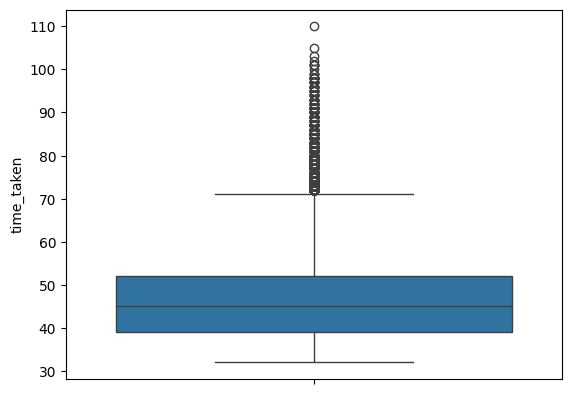

In [37]:
# Boxplot for time_taken
sns.boxplot(y=y_train)
plt.show()

In [38]:
y_train = y_train[y_train <= 70]

X_train = X_train.loc[y_train.index]

print("New X_train shape:", X_train.shape)
print("New y_train shape:", y_train.shape)

New X_train shape: (138944, 11)
New y_train shape: (138944,)


##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [39]:
def outlier_analysis(df, columns):
    # print(columns)
    outlier_summary = {}
    for col in columns:
        # print(col)
        if df[col].dtype not in ("float64", "int64", "int32"):
            continue
        min_value = df[col].min()
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        mean = df[col].mean()
        median = df[col].median()
        mode = df[col].mode()[0]
        maximum = df[col].max()
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        quantile_9 = df[col].quantile(0.99)

        # Count outliers
        outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
        outlier_summary[col] = {
            "Mean": mean,
            "Median": median,
            "Mode": mode,
            "Outliers": outlier_count,
            "min_value": min_value,
            "max_value": maximum,
            "99_quantile": quantile_9,
        }
    # print(outlier_summary)
    return outlier_summary

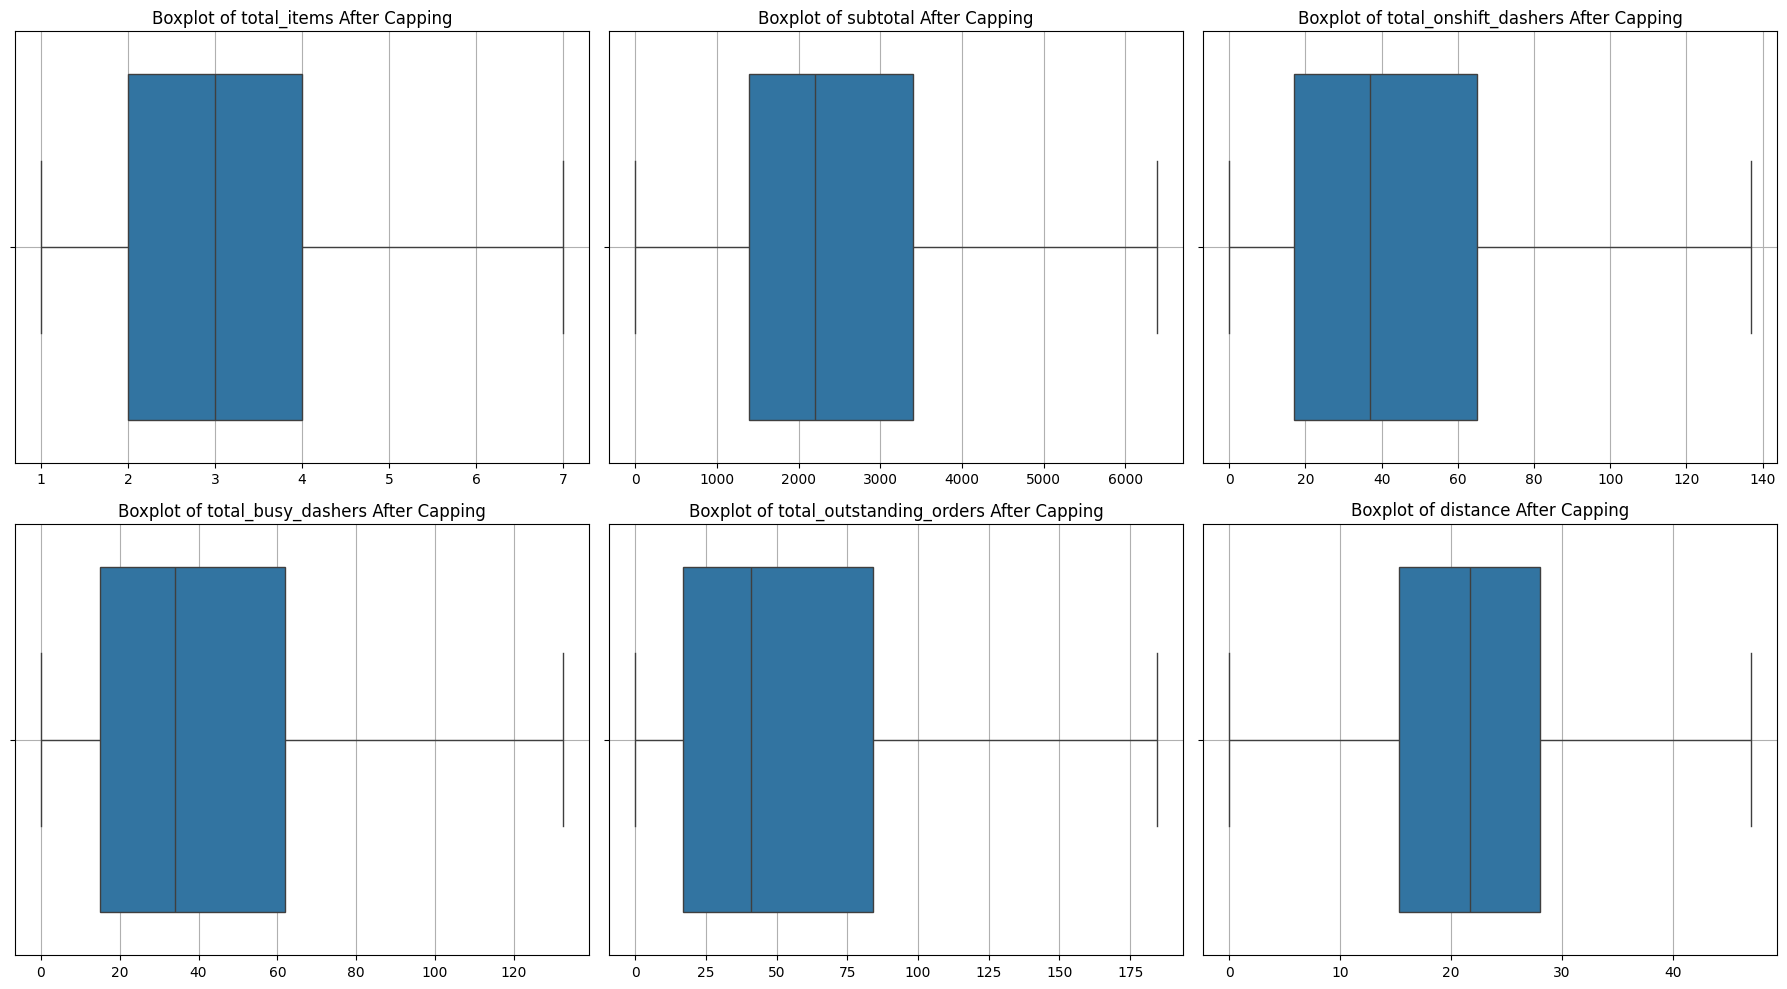

In [70]:
# Function to cap outliers based on IQR bounds
def cap_outliers(df, column, lower_bound, upper_bound):
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Apply capping to each numerical feature
for column, info in outlier_info.items():
    dfAnalysis = cap_outliers(X_train, column, info['lower_bound'], info['upper_bound'])

# Visualize the distribution after capping
plt.figure(figsize=(18, 10))
for i, feature in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=X_train[feature])
    plt.title(f'Boxplot of {feature} After Capping')
    plt.xlabel('')
    plt.grid(True)

plt.tight_layout()
plt.show()


In [73]:
X_train.shape,X_test.shape

((138878, 11), (35147, 11))

In [77]:
# Handle outliers


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [80]:
# Define numerical and categorical columns for easy EDA and data manipulation

#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [81]:
# Plot distributions for all numerical columns

##### **4.1.2**
Check the distribution of categorical features

In [82]:
# Distribution of categorical columns

##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [83]:
# Distribution of time_taken

#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [84]:
# Scatter plot to visualise the relationship between time_taken and other features

#### **4.3** Drop the columns with weak correlations with the target variable

In [85]:
# Drop the weakly correlated columns from training dataset

## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [78]:
# Import libraries
import statsmodels.api as sm
import sklearn
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [86]:
X_train.info()
X_copy = X_train.copy()
X_copy["num_distinct_items"] = X_train["num_distinct_items"].astype("category")

<class 'pandas.core.frame.DataFrame'>
Index: 138878 entries, 143786 to 43567
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   order_protocol            138878 non-null  category
 1   total_items               138878 non-null  float64 
 2   subtotal                  138878 non-null  float64 
 3   num_distinct_items        138878 non-null  category
 4   max_item_price            138878 non-null  int64   
 5   total_onshift_dashers     138878 non-null  float64 
 6   total_busy_dashers        138878 non-null  float64 
 7   total_outstanding_orders  138878 non-null  float64 
 8   distance                  138878 non-null  float64 
 9   pickup_hour               138878 non-null  category
 10  isWeekend                 138878 non-null  category
dtypes: category(4), float64(6), int64(1)
memory usage: 9.0 MB


In [87]:
numeric_vars, categorical_vars = categorize(X_copy, X_copy.columns.tolist())

In [88]:
numeric_vars

['total_items',
 'subtotal',
 'max_item_price',
 'total_onshift_dashers',
 'total_busy_dashers',
 'total_outstanding_orders',
 'distance']

In [90]:
# Apply scaling to the numerical columns
numeric_vars = [
    "total_items",
    "subtotal",
    "max_item_price",
    "total_onshift_dashers",
    "total_busy_dashers",
    "total_outstanding_orders",
    "distance",
]
scaler = MinMaxScaler()
X_train1, X_test1 = X_train.copy(), X_test.copy()
X_train1[numeric_vars] = scaler.fit_transform(X_train1[numeric_vars])
X_test1[numeric_vars] = scaler.transform(X_test1[numeric_vars])

XNote that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [93]:
# Create/Initialise the model
lm = LinearRegression()

In [94]:
# Train the model using the training data
lm.fit(X_train1, y_train)

LinearRegression()

In [95]:
coefficients = lm.coef_
coefficients

array([ -0.67154736,  -0.73976856,   8.66099598,   0.66378754,
         9.50123506, -50.02968954, -17.45614245,  65.28940396,
        21.82254831,  -0.23247162,   1.70019251])

In [96]:
# Make predictions
y_pred = lm.predict(X_test1)

In [97]:
y_pred

array([43.52768137, 30.34042152, 45.91280695, ..., 47.10747782,
       41.48147785, 47.14216518], shape=(35147,))

In [98]:
# Find results for evaluation metrics
# Function to calculate additional statistics
def calculate_additional_statistics(y_true, y_pred, n, k):
    # R²
    r2 = r2_score(y_true, y_pred)

    # Adjusted R²
    adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))

    # Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_true, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_true, y_pred)

    # Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)

    return {
        'R²': r2,
        'Adjusted R²': adj_r2,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

n = X_test.shape[0]
k = X_test.shape[1]

# Calculate statistics
statistics = calculate_additional_statistics(y_test, y_pred, n, k)

# Display the statistics
print("Model Evaluation Statistics:")
for stat_name, stat_value in statistics.items():
    print(f"{stat_name}: {stat_value:.4f}")

Model Evaluation Statistics:
R²: 0.8656
Adjusted R²: 0.8656
MAE: 2.4540
MSE: 11.5404
RMSE: 3.3971


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [99]:
X_train_lm = sm.add_constant(X_train1)
lm = sm.OLS(y_train, X_train_lm)
lm = lm.fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 7.656e+04
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        18:48:44   Log-Likelihood:            -3.6266e+05
No. Observations:              138878   AIC:                         7.253e+05
Df Residuals:                  138866   BIC:                         7.255e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [100]:
vif = pd.DataFrame()
t = X_train1
vif["Features"] = t.columns
vif["VIF"] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features    VIF
5      total_onshift_dashers  33.87
6         total_busy_dashers  30.74
7   total_outstanding_orders  25.40
2                   subtotal  16.12
3         num_distinct_items  15.91
1                total_items  12.96
4             max_item_price  10.04
8                   distance   5.45
0             order_protocol   4.11
9                pickup_hour   2.04
10                 isWeekend   1.55

In [102]:
# Loop through the number of features and test the model
p = X_train1.shape[1]
for i in range(p, 7, -1):
    rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
    rfe.fit(X_train1, y_train)
    col = X_train1.columns[rfe.support_]

    lm = LinearRegression()
    lm.fit(X_train1[col], y_train)

    y_pred_rfe = lm.predict(X_test1[col])
    # r2 = r2_score(y_test, y_pred)
    # rmse = mean_squared_error(y_test, y_pred)
    # n = len(X.columns)
    # p = len(col)
    # adjusted_r2 = (1 - r2) * (n - 1) / (n - i - 1)
    rfe_statistics = calculate_additional_statistics(y_test, y_pred_rfe, n, 28)
    selected_features = X_train.columns[rfe.support_]
    print(f"Selected Features: {selected_features.tolist()}")

    print("\nRFE Model Evaluation Statistics:")
    for stat_name, stat_value in rfe_statistics.items():
        print(f"{stat_name}: {stat_value:.4f}")


Selected Features: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'pickup_hour', 'isWeekend']

RFE Model Evaluation Statistics:
R²: 0.8656
Adjusted R²: 0.8655
MAE: 2.4540
MSE: 11.5404
RMSE: 3.3971
Selected Features: ['order_protocol', 'total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']

RFE Model Evaluation Statistics:
R²: 0.8207
Adjusted R²: 0.8205
MAE: 2.9157
MSE: 15.3985
RMSE: 3.9241
Selected Features: ['order_protocol', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'isWeekend']

RFE Model Evaluation Statistics:
R²: 0.8204
Adjusted R²: 0.8202
MAE: 2.9192
MSE: 15.4258
RMSE: 3.9276
Selected Features: ['order_protocol', 'subtotal', 'max_item_price', 'total_o

In [103]:
col = X_train1.columns[rfe.support_]

In [104]:
X_train1.columns[~rfe.support_]

Index(['total_items', 'num_distinct_items', 'pickup_hour'], dtype='object')

In [105]:
X_train_rfe = X_train1[col]

In [106]:
X_train_rfe.head()

order_protocol  subtotal  max_item_price  total_onshift_dashers  \
143786            3.0  0.390607        0.098639               0.131387   
165941            5.0  0.168141        0.054354               0.262774   
53920             1.0  0.434442        0.062925               0.102190   
150506            5.0  0.257534        0.064626               0.620438   
69767             5.0  0.379648        0.066327               0.729927   

        total_busy_dashers  total_outstanding_orders  distance isWeekend  
143786            0.135849                  0.130081  0.348343         1  
165941            0.264151                  0.265583  0.347494         0  
53920             0.067925                  0.059621  0.637213         0  
150506            0.845283                  0.542005  0.733220         0  
69767             0.588679                  0.737127  0.231096         1

In [107]:
vif = pd.DataFrame()
t = X_train_rfe
vif["Features"] = t.columns
vif["VIF"] = [variance_inflation_factor(t.values, i) for i in range(t.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by="VIF", ascending=False)
vif

Features    VIF
3     total_onshift_dashers  33.69
4        total_busy_dashers  30.66
5  total_outstanding_orders  25.24
2            max_item_price   6.53
1                  subtotal   5.39
6                  distance   4.80
0            order_protocol   3.72
7                 isWeekend   1.53

In [108]:
# Build the final model with selected number of features
col = X_train1.columns[rfe.support_]
X_train_rfe_sm = sm.add_constant(X_train_rfe)
lm_stats = sm.OLS(y_train, X_train_rfe_sm)
rfe_model = lm_stats.fit()
print(rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 7.361e+04
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        18:54:02   Log-Likelihood:            -3.8340e+05
No. Observations:              138878   AIC:                         7.668e+05
Df Residuals:                  138869   BIC:                         7.669e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [110]:
y_train_pred = rfe_model.predict(X_train_rfe_sm)
y_train_pred.head()

143786    44.893771
165941    39.213303
53920     49.500755
150506    39.547950
69767     44.161309
dtype: float64

In [112]:
X_test_new = X_test1[col]
X_test_new_sm = sm.add_constant(X_test_new)
y_test_pred = rfe_model.predict(X_test_new_sm)


In [113]:
y_test_pred.head()

119426    45.406944
5638      28.511649
86872     43.874170
108139    45.355022
144775    47.974438
dtype: float64

In [114]:
scaled_coeff = rfe_model.params

In [115]:
standrdised_res = (y_train - y_train_pred) / (y_train - y_train_pred).std()

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

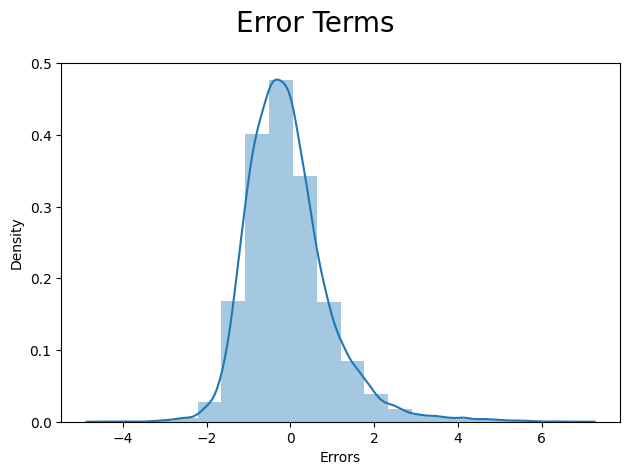

In [116]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
res = y_test - y_test_pred
res1 = res / res.std()
fig = plt.figure()

sns.distplot(res1, bins=20)
fig.suptitle("Error Terms", fontsize=20)
plt.xlabel("Errors", fontsize=10)
plt.tight_layout()
plt.show()

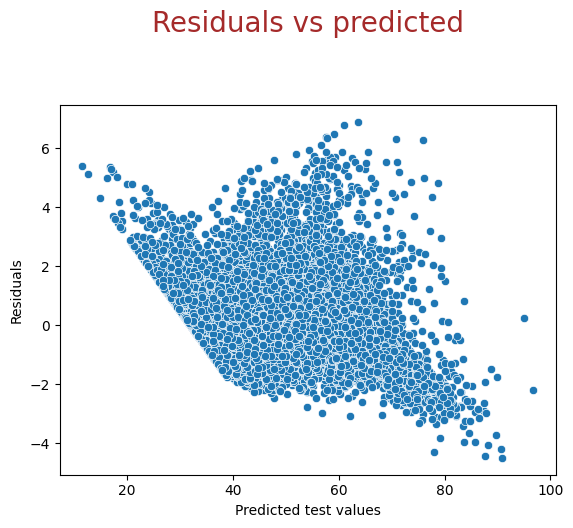

In [117]:
sns.scatterplot(x=y_test_pred, y=res1)
plt.xlabel("Predicted test values")
plt.ylabel("Residuals")
plt.title("Residuals vs predicted\n\n", fontdict={"fontsize": 20, "color": "brown"})
plt.show()

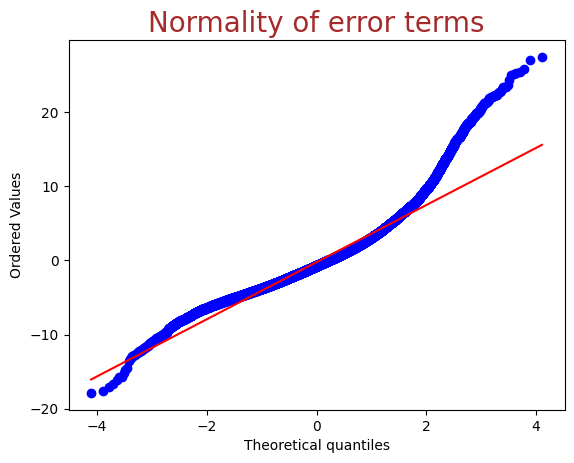

In [119]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normality of error terms", fontdict={"fontsize": 20, "color": "brown"})
plt.show()

In [120]:
print(rfe_model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                 7.361e+04
Date:                Sun, 18 May 2025   Prob (F-statistic):               0.00
Time:                        18:58:21   Log-Likelihood:            -3.8340e+05
No. Observations:              138878   AIC:                         7.668e+05
Df Residuals:                  138869   BIC:                         7.669e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [121]:
vif

Features    VIF
3     total_onshift_dashers  33.69
4        total_busy_dashers  30.66
5  total_outstanding_orders  25.24
2            max_item_price   6.53
1                  subtotal   5.39
6                  distance   4.80
0            order_protocol   3.72
7                 isWeekend   1.53

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [ ]:
# Compare the scaled vs unscaled features used in the final model
scaled_train, scaled_y_train = df_train, df_train.pop("time_taken")
scaled_test, scaled_y_test = df_test, df_test.pop("time_taken")
scaled_train = scaled_train[col]
scaled_test = scaled_test[col]
lm = LinearRegression()
lm.fit(scaled_train, scaled_y_train)
unscaled_coef = lm.coef_

In [ ]:
f = pd.DataFrame({"Unscaled Coeff": unscaled_coef, "scaled_ceff": scaled_coeff})
f

Unscaled Coeff  scaled_ceff
total_items                     0.105632    43.106212
subtotal                        0.001642    36.169533
max_item_price                  0.000913    12.906367
total_onshift_dashers          -0.347114   -57.799373
total_busy_dashers             -0.150802   -23.240025
total_outstanding_orders        0.353675    99.089025
distance                        0.478092    32.070712
isWeekend                       1.068274     1.291171

scaled_train=scaled_train.columns[rfe.support_]
Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [ ]:
# Analyze the effect of a unit change in a feature, say 'total_items'
diff = 0.1015632
f["Unit_Change"] = f["Unscaled Coeff"] + diff
f

Unscaled Coeff  scaled_ceff  Unit_Change
total_items                     0.105632    43.106212     0.207195
subtotal                        0.001642    36.169533     0.103205
max_item_price                  0.000913    12.906367     0.102476
total_onshift_dashers          -0.347114   -57.799373    -0.245551
total_busy_dashers             -0.150802   -23.240025    -0.049238
total_outstanding_orders        0.353675    99.089025     0.455238
distance                        0.478092    32.070712     0.579655
isWeekend                       1.068274     1.291171     1.169838

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes, in the original dataset provided and including derived metrics, we have the following categorical variables:
1. Market_Id
2. store_primary_category
3. order_protocol
4. pickup_hour
5. isWeekend
From what we can infer, isWeekend has an impact on dependent variable as included in the final model



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> It means 20% of the data will be used for validation to test the accuracy of the model built by the remaining data



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> distance has the highest correlation of .46



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

> Using various algorithms and box plots, I made a function to detect outliers and check for negative values.
Using that I first removed the negative values, then visualising the box plots, removed outliers above and below IQR's upper bound and lower bound



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
> Based on the final model I got the top three were: total_items, distance followed by subtotal



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
> A linear regression model is a type of supervised learning algorithm used
to establish a relationship between a dependent variable (target variable)
and one or more independent variables (predictor variables). The aim is to create a model that establishes a linear equation between the dependent and independent variables by minimizing the loss using various approaches, the most common ones are minimizing loss by minimizing Mean Squared Error or using Gradient Descent

**Assumptions**

Linear regression assumes the following:

1. **Linearity**: The relationship between the dependent variable and one
or more independent variables is linear.
2. **Independence**: Each observation is independent of the others.
3. **Homoscedasticity**: The variance of the error term is constant across
all levels of the predictor variables.
4. **Normality**: The error term follows a normal distribution.
5. **No multicollinearity**: The predictor variables are not highly
correlated with each other

**Simple Linear Regression**
y = β0 + β1x + ε
Here y is the dependent variable, ε is the error term, β0 is the slope and β1 is the slope coefficient

**Multiple Linear Regression**
This model includes multiple independent variables and is used to analyze
relationships between more than two variables.

The linear regression model can be estimated using various methods,
including:

1. **Ordinary Least Squares (OLS)**: This is the most commonly used method
for estimating linear regression models. OLS minimizes the sum of the
squared errors between observed and predicted values.
2. **Gradient Descent**: It uses an iterative approach to minimize the loss




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
> In simple linear regression, there is only 1 independent variable, whereas in multiple linear regression, the feature which we are trying to predict is dependent on 2 or more than 2 variables.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> Cost Function tells how far the predicted values are from actual values. It is minimized using techniques like Mean Squared Error (MSE) or its variant, the Mean Absolute Error (MAE). The goal is to find the optimal parameters that minimize the MSE, which measures the average squared difference between predicted and actual values.
Other techniques include gradient descent or stochastic gradient descent



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

> **Overfitting**

Overfitting occurs when a model is too complex and learns the noise in the
training data, rather than the underlying patterns or relationships. As a
result, the model performs well on the training data but poorly on new,
unseen data.


**Underfitting**

Underfitting occurs when a model is too simple and fails to capture the
underlying patterns or relationships in the training data. As a result,
the model performs poorly on both the training and new data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
> Residual plots determine if our residuals are normally distributed, which tells whether our linear regression model is valid or not. Non normalcy of error terms means there is some problem with our algorithm

**Quantile-Quantile (Q-Q) Plot**: A Q-Q plot can be used to detect non-normality in the residuals.

**Scatter Plot**: A scatter plot with randomly scattered points
indicates that the relationship between the independent variable(s) and
the dependent variable is linear.

**Boxplot Residual Plot**: If the boxplot residual plot shows outliers,
it suggests that there are extreme values in the data that need to be
addressed.